In [21]:
# load libraries
library(ggplot2)
library(dplyr)
library(reshape2)

In [22]:
# The Gapminder website contains over 500 data sets with information about
# the world's population. Your task is to continue the investigation you did at the
# end of Problem Set 4 or you can start fresh and choose a different
# data set from Gapminder.

# If you’re feeling adventurous or want to try some data munging see if you can
# find a data set or scrape one from the web.

# In your investigation, examine 3 or more variables and create 2-5 plots that make
# use of the techniques from Lesson 5.

# You can find a link to the Gapminder website in the Instructor Notes.

# Once you've completed your investigation, create a post in the discussions that includes:
#       1. the variable(s) you investigated, your observations, and any summary statistics
#       2. snippets of code that created the plots
#       3. links to the images of your plots

# Copy and paste all of the code that you used for
# your investigation, and submit it when you are ready.

In [23]:
# load data set
df <- read.csv('life_expectancy_at_birth.csv', sep = ',')

In [24]:
# explore first rows
head(df)

country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,...,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016
Afghanistan,32.3,32.7,33.2,33.6,34.1,34.5,34.9,35.4,35.8,...,59.7,60.2,60.8,61.2,61.7,62.1,62.5,62.9,63.3,63.7
Albania,62.3,63.3,64.2,64.9,65.5,65.8,66.1,66.3,66.5,...,75.7,75.9,76.3,76.7,77.0,77.4,77.7,78.0,78.2,78.3
Algeria,46.1,46.6,47.1,47.5,48.0,48.4,48.8,49.2,49.6,...,73.6,74.0,74.4,74.7,74.9,75.2,75.4,75.6,75.9,76.1
Angola,33.3,33.6,33.9,34.3,34.6,35.0,35.4,35.8,36.2,...,55.1,56.2,57.2,58.2,59.0,59.8,60.4,60.9,61.2,61.5
Antigua and Barbuda,62.1,62.6,63.0,63.4,63.8,64.1,64.5,64.9,65.2,...,74.9,75.1,75.2,75.4,75.6,75.7,75.9,76.0,76.2,76.4
Argentina,65.0,65.1,65.2,65.3,65.4,65.5,65.6,65.8,66.0,...,75.1,75.3,75.4,75.6,75.8,75.9,76.1,76.3,76.4,76.6


In [25]:
# identify count of NAs in data set
sum(is.na(df))

[1] 393

In [26]:
# omit na values
df <-df %>%
na.omit()		
dim(df)

[1] 180  58

In [27]:
# identify count of NAs in data set
sum(is.na(df))

[1] 0

In [37]:
summary(df$X1960)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  28.20   43.08   52.85   53.37   63.80   73.50 

In [33]:
summary(df$X2016)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  51.80   66.25   73.25   71.50   77.03   84.00 

Warning message:
"Removed 2 rows containing missing values (geom_bar)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

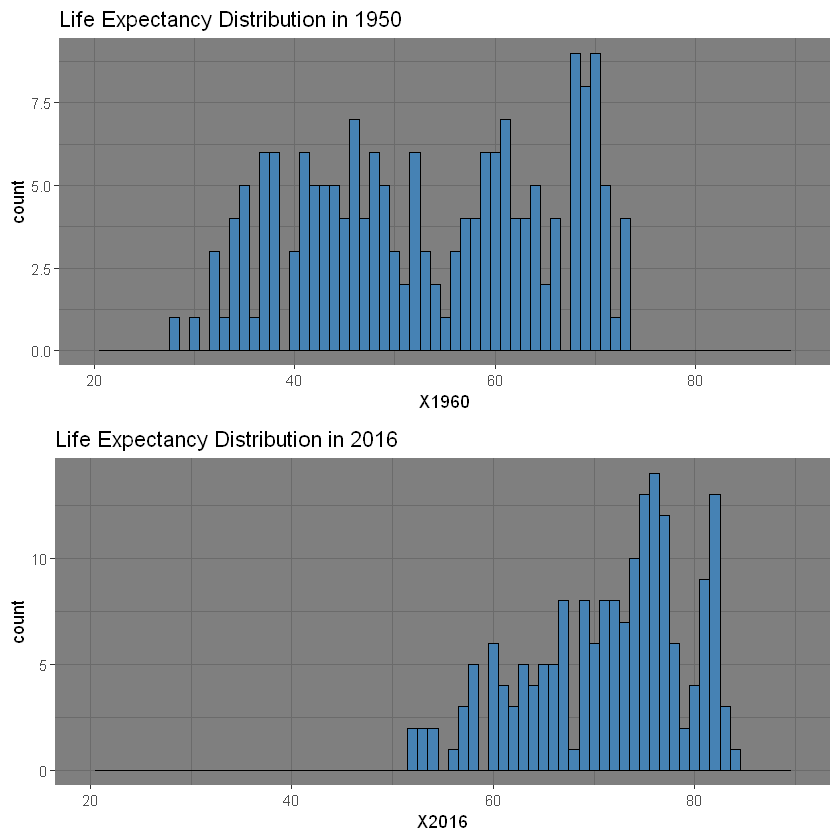

In [43]:
library(gridExtra)
# Histograms for both years:
p1 <- ggplot(aes(x = X1960), data = df) +
    theme_dark() +
    geom_histogram(binwidth = 1, color = 'black', fill = 'steelblue') +
    ggtitle("Life Expectancy Distribution in 1950") + 
    scale_x_continuous(limits = c(20, 90))
p2 <- ggplot(aes(x = X2016), data = df) +
    theme_dark() +
    geom_histogram(binwidth = 1, color = 'black', fill = 'steelblue') +
    ggtitle("Life Expectancy Distribution in 2016") +
    scale_x_continuous(limits = c(20, 90))
grid.arrange(p1, p2, ncol = 1)

In [46]:
library(tidyr)
# Convert data to long format:
df_long <- gather(df, key = year, value = life_exp, -country, convert = TRUE)
df_long$year <- as.factor(sub('X', '', df_long$year))

# Subset 15-year periods:
fifteen_y <- as.character(seq(1956, 2016, 15))
df_fifteen <- filter(df_long, year %in% fifteen_y)

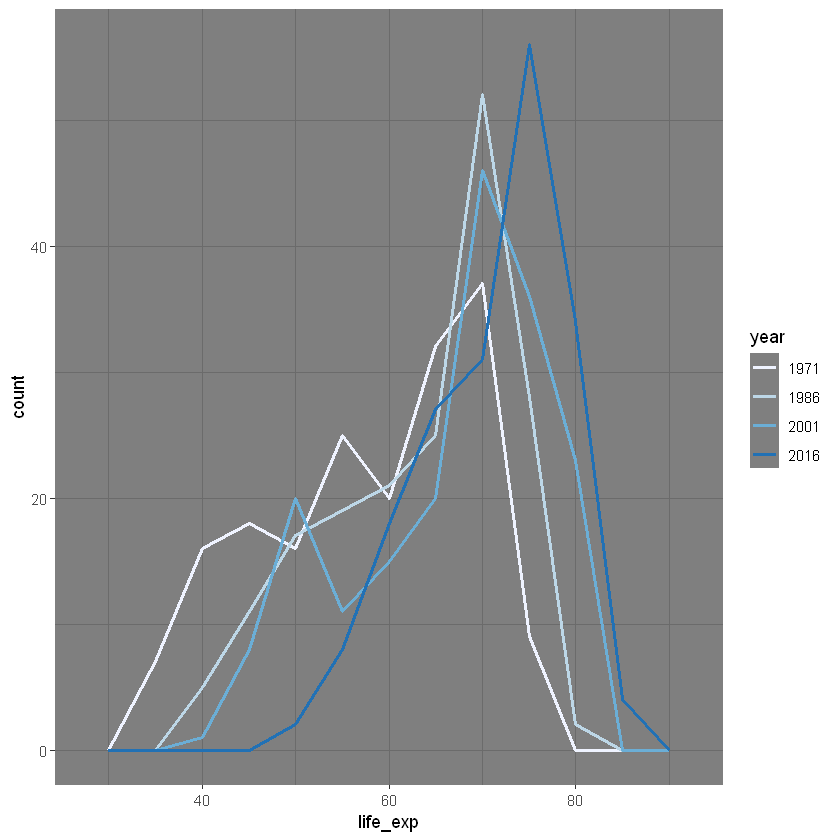

In [47]:
ggplot(aes(x = life_exp), data = df_fifteen) +
    theme_dark() +
    geom_freqpoly(aes(color = year), binwidth = 5, size = 1) +
    scale_color_brewer(type = 'seq', palette = 'Blues')

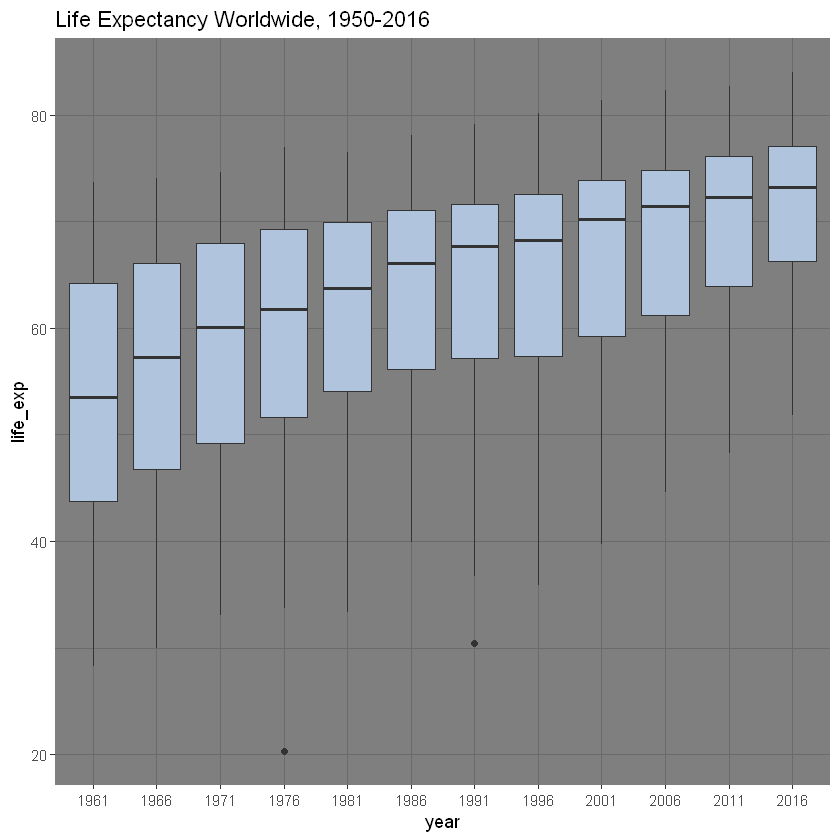

In [48]:
five_y <- as.character(seq(1961, 2016, 5))
df_five <- filter(df_long, year %in% five_y)
ggplot(aes(x = year, y = life_exp), data = df_five) +
    theme_dark() +
    geom_boxplot(fill = "lightsteelblue") + 
    ggtitle("Life Expectancy Worldwide, 1950-2016")